In [36]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [66]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.optimizers import gradient_descent_v2 
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

(x_train,y_train),(x_test,y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)


# Initializers define the way to set initial random weights in Keras

"""Initializing kernel weights with inappropriate values will lead to 
divergence or a slow-down in the training of your neural network
"""


model = keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

(60000, 28, 28)
(60000, 28, 28, 1)


In [89]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, verbose = 0)
histories = []
histories.append(history)

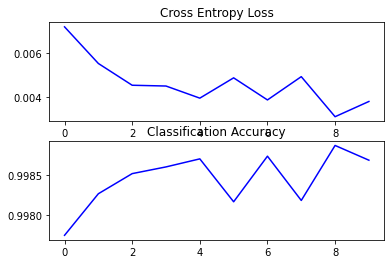

In [75]:
for i in range(len(histories)):
 # plot loss
 plt.subplot(2, 1, 1)
 plt.title('Cross Entropy Loss')
 plt.plot(histories[i].history['loss'], color='blue', label='train')
 #plt.plot(histories[i].history['val_loss'], color='orange', label='test')
 # plot accuracy
 plt.subplot(2, 1, 2)
 plt.title('Classification Accuracy')
 plt.plot(histories[i].history['accuracy'], color='blue', label='train')
 #plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
 plt.show()

In [60]:
model.evaluate(x_test,y_test,verbose = False)

[5.405637264251709, 0.025800000876188278]

In [86]:
y_predicted = model.predict(x_test)
print(np.argmax(y_predicted))

7
